In [1]:
from keras.datasets import reuters

(train_data,train_labels),(test_data,test_labels) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 1s 0us/step


/home/jimbrootan/anaconda3/envs/pythonds/lib/python3.8/site-packages/tensorflow/python/keras/datasets/reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/home/jimbrootan/anaconda3/envs/pythonds/lib/python3.8/site-packages/tensorflow/python/keras/datasets/reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [2]:
train_data.shape
train_data

array([list([1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]),
       list([1, 3267, 699, 3434, 2295, 56, 2, 7511, 9, 56, 3906, 1073, 81, 5, 1198, 57, 366, 737, 132, 20, 4093, 7, 2, 49, 2295, 2, 1037, 3267, 699, 3434, 8, 7, 10, 241, 16, 855, 129, 231, 783, 5, 4, 587, 2295, 2, 2, 775, 7, 48, 34, 191, 44, 35, 1795, 505, 17, 12]),
       list([1, 53, 12, 284, 15, 14, 272, 26, 53, 959, 32, 818, 15, 14, 272, 26, 39, 684, 70, 11, 14, 12, 3886, 18, 180, 183, 187, 70, 11, 14, 102, 32, 11, 29, 53, 44, 704, 15, 14, 19, 758, 15, 53, 959, 47, 1013, 15, 14, 19, 132, 15, 39, 965, 32, 11, 14, 147, 72, 11, 180, 183, 187, 44, 11, 14, 102, 19, 11, 123, 186, 90, 67, 960, 4, 78, 13, 68, 467, 511, 110,

In [3]:
word_index = reuters.get_word_index()
word_index

557056/550378 [==============================] - 0s 0us/step


{'mdbl': 10996,
 'fawc': 16260,
 'degussa': 12089,
 'woods': 8803,
 'hanging': 13796,
 'localized': 20672,
 'sation': 20673,
 'chanthaburi': 20675,
 'refunding': 10997,
 'hermann': 8804,
 'passsengers': 20676,
 'stipulate': 20677,
 'heublein': 8352,
 'screaming': 20713,
 'tcby': 16261,
 'four': 185,
 'grains': 1642,
 'broiler': 20680,
 'wooden': 12090,
 'wednesday': 1220,
 'highveld': 13797,
 'duffour': 7593,
 '0053': 20681,
 'elections': 3914,
 '270': 2563,
 '271': 3551,
 '272': 5113,
 '273': 3552,
 '274': 3400,
 'rudman': 7975,
 '276': 3401,
 '277': 3478,
 '278': 3632,
 '279': 4309,
 'dormancy': 9381,
 'errors': 7247,
 'deferred': 3086,
 'sptnd': 20683,
 'cooking': 8805,
 'stratabit': 20684,
 'designing': 16262,
 'metalurgicos': 20685,
 'databank': 13798,
 '300er': 20686,
 'shocks': 20687,
 'nawg': 7972,
 'tnta': 20688,
 'perforations': 20689,
 'affiliates': 2891,
 '27p': 20690,
 'ching': 16263,
 'china': 595,
 'wagyu': 16264,
 'affiliated': 3189,
 'chino': 16265,
 'chinh': 16266,
 '

In [4]:
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])
decoded_news = ' '.join([reverse_word_index.get(i) for i in train_data[0]])
#decoded_news

In [5]:
import numpy as np


def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        #print(i)
        #print(sequence)
        results[i, sequence] = 1
    return results


X_train = vectorize_sequences(train_data)
X_test = vectorize_sequences(test_data)
 
print(train_data.shape)
print(X_train.shape)

(8982,)
(8982, 10000)


In [6]:
from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)
one_hot_train_labels[0]
train_labels[0]

3

In [7]:
from  keras import models
from  keras import layers,optimizers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))



In [8]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [9]:
X_val = X_train[:1000]
org_X_train = X_train[1000:]
y_val = one_hot_train_labels[:1000]
org_y_train =one_hot_train_labels[1000:]

In [10]:
result = model.fit(org_X_train,org_y_train,validation_data=(X_val,y_val),epochs=20,batch_size=512)

Epoch 1/20
16/16 [==============================] - 2s 144ms/step - loss: 2.6136 - accuracy: 0.5118 - val_loss: 1.7311 - val_accuracy: 0.6460
Epoch 2/20
16/16 [==============================] - 1s 69ms/step - loss: 1.4414 - accuracy: 0.6997 - val_loss: 1.3229 - val_accuracy: 0.7140
Epoch 3/20
16/16 [==============================] - 1s 65ms/step - loss: 1.0959 - accuracy: 0.7621 - val_loss: 1.1638 - val_accuracy: 0.7540
Epoch 4/20
16/16 [==============================] - 1s 84ms/step - loss: 0.8808 - accuracy: 0.8103 - val_loss: 1.0675 - val_accuracy: 0.7730
Epoch 5/20
16/16 [==============================] - 132s 8s/step - loss: 0.7078 - accuracy: 0.8518 - val_loss: 0.9924 - val_accuracy: 0.7920
Epoch 6/20
16/16 [==============================] - 1s 65ms/step - loss: 0.5703 - accuracy: 0.8807 - val_loss: 0.9582 - val_accuracy: 0.8010
Epoch 7/20
16/16 [==============================] - 1s 62ms/step - loss: 0.4622 - accuracy: 0.9034 - val_loss: 0.9481 - val_accuracy: 0.7950
Epoch 8/20
1

In [11]:
import matplotlib.pyplot as plt
 

def plot_loss_and_accuracy(result):
    history_dict = result.history
    history_dict.keys()
    loss_values = history_dict['loss']
    val_loss_values = history_dict['val_loss']
    acc = history_dict['accuracy']
    val_acc = history_dict['val_accuracy']


    epochs = range(1, len(acc) + 1)
    plt.plot(epochs, loss_values, 'bo', label='Training loss')
    plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    plt.clf()

    plt.plot(epochs, acc, 'bo', label='Training accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()



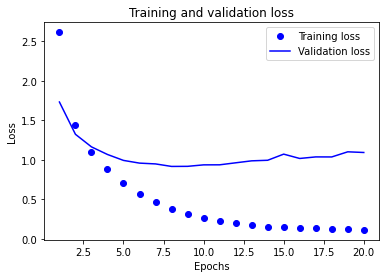

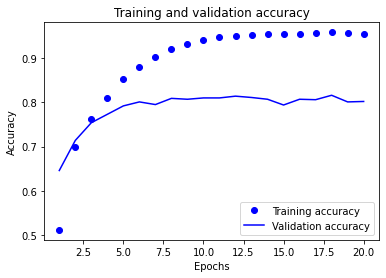

In [12]:
plot_loss_and_accuracy(result)

Epoch 1/10
16/16 [==============================] - 1s 84ms/step - loss: 2.6094 - accuracy: 0.4717 - val_loss: 1.6545 - val_accuracy: 0.6570
Epoch 2/10
16/16 [==============================] - 1s 70ms/step - loss: 1.3604 - accuracy: 0.7157 - val_loss: 1.2861 - val_accuracy: 0.7300
Epoch 3/10
16/16 [==============================] - 1s 66ms/step - loss: 1.0113 - accuracy: 0.7881 - val_loss: 1.1074 - val_accuracy: 0.7610
Epoch 4/10
16/16 [==============================] - 1s 64ms/step - loss: 0.7912 - accuracy: 0.8286 - val_loss: 1.0611 - val_accuracy: 0.7540
Epoch 5/10
16/16 [==============================] - 1s 81ms/step - loss: 0.6275 - accuracy: 0.8623 - val_loss: 0.9420 - val_accuracy: 0.7930
Epoch 6/10
16/16 [==============================] - 1s 66ms/step - loss: 0.5001 - accuracy: 0.8926 - val_loss: 0.9152 - val_accuracy: 0.8030
Epoch 7/10
16/16 [==============================] - 1s 60ms/step - loss: 0.4027 - accuracy: 0.9159 - val_loss: 0.8931 - val_accuracy: 0.8110
Epoch 8/10
16

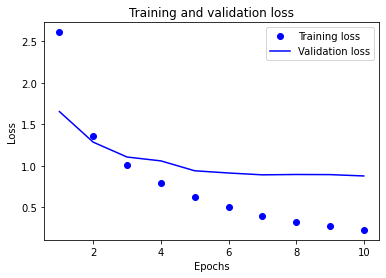

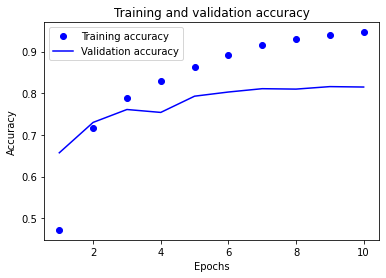

In [13]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
result = model.fit(org_X_train,org_y_train,validation_data=(X_val,y_val),epochs=10,batch_size=512)
plot_loss_and_accuracy(result)

In [ ]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
result = model.fit(org_X_train,org_y_train,validation_data=(X_val,y_val),epochs=10,batch_size=512)
plot_loss_and_accuracy(result)


In [ ]:
evaluate_result = model.evaluate(X_test,one_hot_test_labels)
print(evaluate_result)

In [ ]:
prediction = model.predict(X_test)
prediction

In [17]:
sum(prediction[0])

0.9999999819851837

In [18]:
np.argmax(prediction[0])


3

In [19]:
one_hot_test_labels[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)